In [7]:
import ortools
from ortools.constraint_solver import routing_enums_pb2
import ortools.constraint_solver.pywrapcp as pywrapcp
from PIL import Image
from IPython.display import display
import pandas as pd
from itertools import zip_longest
from geopy.distance import geodesic



import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [8]:
teste = pd.read_excel(r"ara_adm (1).xlsx")

In [9]:
teste

,qtd,lat,long
0,0,-19.837913,-40.082170
1,5,-19.903273,-40.232890
2,2,-19.904354,-40.223015
3,2,-19.920553,-40.174908
4,2,-19.927172,-40.164630
...,...,...,...
138,5,-20.261312,-40.263690
139,3,-20.257410,-40.263832
140,2,-20.250269,-40.265118
141,1,-20.214258,-40.263565


In [10]:
teste['lat'] = teste['lat'].astype(str)
teste['long'] = teste['long'].astype(str)
teste['lat'] = teste['lat'].str.replace(",",".")
teste['long'] = teste['long'].str.replace(",",".")
teste['lat'] = teste['lat'].astype(float)
teste['long'] = teste['long'].astype(float)
teste['qtd'] = teste['qtd'].astype(int)

In [11]:
x = list(zip_longest(teste['lat'], teste['long'], fillvalue=None))

# Criação da matriz de distancia

In [12]:
# Crie uma matriz de distância vazia
distance_matrix = []

# Calcule as distâncias entre todos os pares de coordenadas
for coord1 in x:
    distances = []
    for coord2 in x:
        distancia = geodesic(coord1, coord2).kilometers
        distances.append(distancia)
    distance_matrix.append(distances)

# Imprima a matriz de distância
# for i, row in enumerate(distance_matrix):
#     for j, distancia in enumerate(row):
#         print(f"Distância entre cidade {i} e cidade {j}: {distancia} km")


In [14]:
# distance_matrix

# Seleção dos pontos segundo a regiao e a distancia

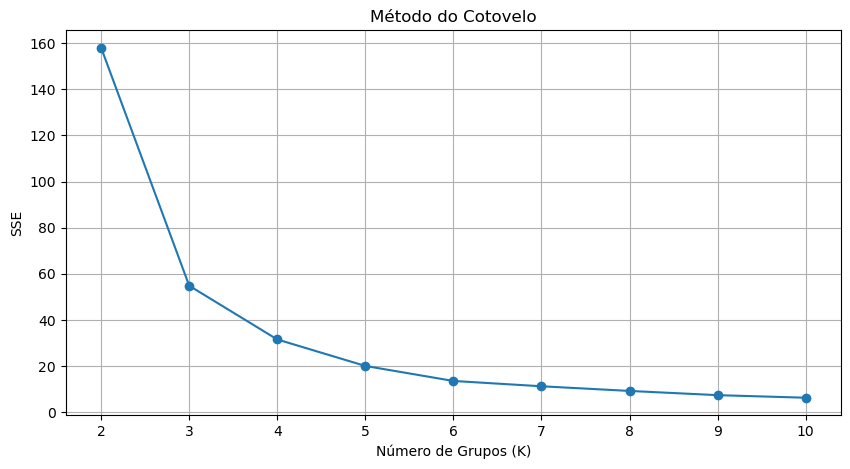

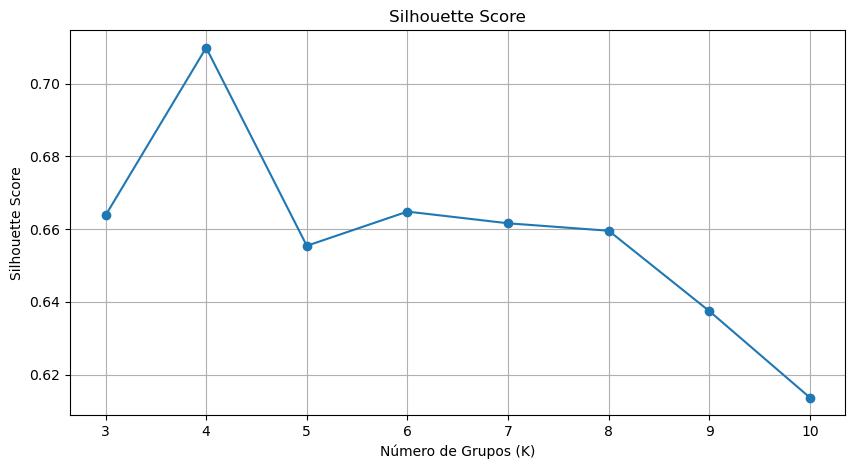

In [15]:
def find_optimal_k(data_frame, max_k=10):
    # Selecionar as colunas 'lat' e 'long'
    features = data_frame[['lat', 'long']]

    # Padronizar as features para média zero e desvio padrão 1
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Inicializar listas para guardar os valores do SSE (Erro Quadrático Médio) e silhouette_score
    sse = []
    silhouette_scores = []

    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(scaled_features)

        # Calcular o SSE
        sse.append(kmeans.inertia_)

        # Calcular o silhouette_score para avaliação
        if k > 2:
            silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

    # Plotar o gráfico do SSE para o método do cotovelo
    plt.figure(figsize=(10, 5))
    plt.plot(range(2, max_k + 1), sse, marker='o')
    plt.title('Método do Cotovelo')
    plt.xlabel('Número de Grupos (K)')
    plt.ylabel('SSE')
    plt.grid()
    plt.show()

    # Plotar o gráfico do silhouette_score
    plt.figure(figsize=(10, 5))
    plt.plot(range(3, max_k + 1), silhouette_scores, marker='o')
    plt.title('Silhouette Score')
    plt.xlabel('Número de Grupos (K)')
    plt.ylabel('Silhouette Score')
    plt.grid()
    plt.show()

# Exemplo de uso da função
if __name__ == "__main__":
    # Carregar seu DataFrame pandas com as colunas 'lat' e 'long'
    # df = pd.read_csv('seuarquivo.csv')

    # Chamando a função para encontrar o número ideal de grupos
    find_optimal_k(teste)

In [16]:
def cluster_data(data_frame, n_clusters):
    # Selecionar as colunas 'lat' e 'long'
    features = data_frame[['lat', 'long']]

    # Padronizar as features para média zero e desvio padrão 1
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Executar o algoritmo K-Means com o número de grupos especificado
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    data_frame['cluster'] = kmeans.fit_predict(scaled_features)

    return data_frame

# Exemplo de uso da função
if __name__ == "__main__":
    # Carregar seu DataFrame pandas com as colunas 'lat' e 'long'
    # df = pd.read_csv('seuarquivo.csv')

    # Especificar o número desejado de grupos (n)
    n_clusters = 4

    # Chamar a função para agrupar os dados em n grupos
    clustered_df = cluster_data(teste, n_clusters)

    # O DataFrame 'clustered_df' agora terá uma nova coluna 'cluster' com os rótulos de grupo


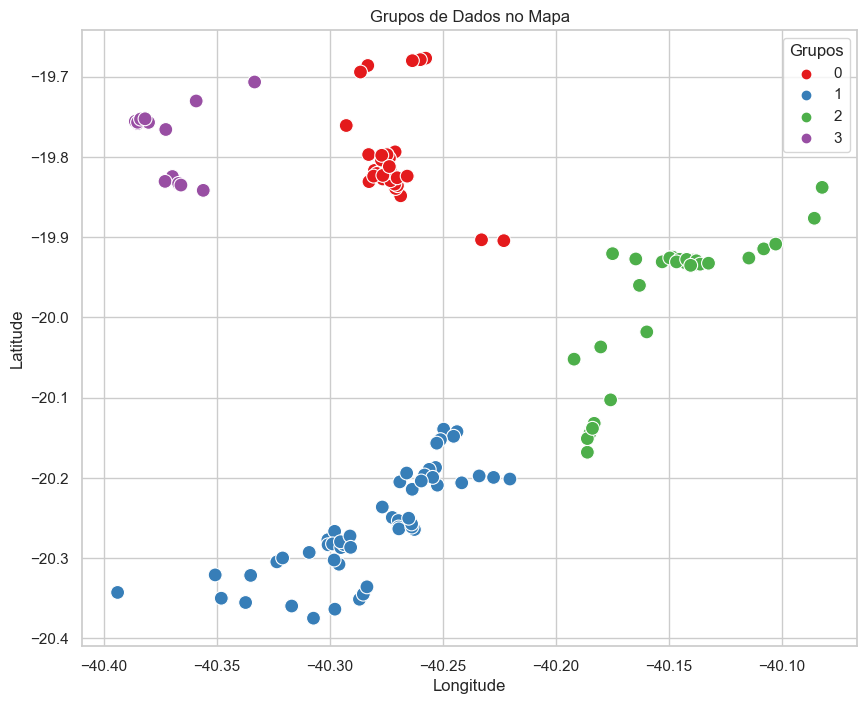

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_clusters_on_map(data_frame, lat_col, long_col, cluster_col):
    # Extrair as coordenadas de latitude e longitude e os rótulos de grupo
    lats = data_frame[lat_col]
    longs = data_frame[long_col]
    clusters = data_frame[cluster_col]

    # Configurar o estilo do gráfico de dispersão
    sns.set(style='whitegrid')
    plt.figure(figsize=(10, 8))

    # Plotar os pontos coloridos por grupo
    sns.scatterplot(x=longs, y=lats, hue=clusters, palette='Set1', s=100, legend='full')

    # Configurar rótulos e título
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Grupos de Dados no Mapa')

    # Mostrar a legenda
    plt.legend(title='Grupos', loc='upper right')

    # Exibir o mapa
    plt.show()

# Exemplo de uso da função
if __name__ == "__main__":
    # Carregar seu DataFrame pandas com as colunas 'lat', 'long', e 'cluster'
    # df = pd.read_csv('seuarquivo.csv')

    # Chamar a função para plotar os grupos no mapa
    plot_clusters_on_map(teste, 'lat', 'long', 'cluster')


# Seleção dos pontos de start
## Criterios
demanda na regiao
distancia
numero de linhas desejadas pelo usuario

## Restrições de capacidade

restriçoes de demanda, quantidade de veículos, capacidade dos veiculos

## Rotas ciculares

In [ ]:
"""Capacited Vehicles Routing Problem (CVRP)."""

from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp


def create_data_model(distance_matrix):
    """Stores the data for the problem."""
    data = {}
    data["distance_matrix"] = distance_matrix
    data["demands"] = teste['qtd']
    data["vehicle_capacities"] = [46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46]
    data["num_vehicles"] = len(data["vehicle_capacities"])
    data["depot"] = 0
    return data


def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    print(f"Objective: {solution.ObjectiveValue()}")
    total_distance = 0
    total_load = 0
    for vehicle_id in range(data["num_vehicles"]):
        index = routing.Start(vehicle_id)
        plan_output = f"Route for vehicle {vehicle_id}:\n"
        route_distance = 0
        route_load = 0
        while not routing.IsEnd(index):
            node_index = manager.IndexToNode(index)
            route_load += data["demands"][node_index]
            plan_output += f" {node_index} Load({route_load}) -> "
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id
            )
        plan_output += f" {manager.IndexToNode(index)} Load({route_load})\n"
        plan_output += f"Distance of the route: {route_distance}m\n"
        plan_output += f"Load of the route: {route_load}\n"
        print(plan_output)
        total_distance += route_distance
        total_load += route_load
    print(f"Total distance of all routes: {total_distance}m")
    print(f"Total load of all routes: {total_load}")

    
def verify_data(data):
    demanda = sum([x for x in data["demands"]])
    lugares = sum([x for x in data["vehicle_capacities"]])
    
    if lugares >= demanda:
        print(f"existem mais lugares que demanda")
        return True
        
    if demanda > lugares:
        print(f"Não existem lugares suficientes \n"
             f"{lugares} -- lugares, {demanda} --  demanda\n")
        return False
    

def main():
    """Solve the CVRP problem."""
    # Instantiate the data problem.
    data = create_data_model(distance_matrix)

    x = verify_data(data)
    
    if x == False:
        print(x)
    
    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(
        len(data["distance_matrix"]), data["num_vehicles"], data["depot"]
    )

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)

    # Create and register a transit callback.
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data["distance_matrix"][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Add Capacity constraint.
    def demand_callback(from_index):
        """Returns the demand of the node."""
        # Convert from routing variable Index to demands NodeIndex.
        from_node = manager.IndexToNode(from_index)
        return data["demands"][from_node]

    demand_callback_index = routing.RegisterUnaryTransitCallback(demand_callback)
    routing.AddDimensionWithVehicleCapacity(
        demand_callback_index,
        0,  # null capacity slack
        data["vehicle_capacities"],  # vehicle maximum capacities
        True,  # start cumul to zero
        "Capacity",
    )

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC
    )
    search_parameters.local_search_metaheuristic = (
        routing_enums_pb2.LocalSearchMetaheuristic.GUIDED_LOCAL_SEARCH
    )
    search_parameters.time_limit.FromSeconds(1)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(data, manager, routing, solution)


if __name__ == "__main__":
    main()

In [ ]:
x = list(zip_longest(teste['lat'], teste['long'], fillvalue=None))

In [ ]:
# Crie uma matriz de distância vazia
distance_matrix = []

# Calcule as distâncias entre todos os pares de coordenadas
for coord1 in x:
    distances = []
    for coord2 in x:
        distancia = geodesic(coord1, coord2).kilometers
        distances.append(distancia)
    distance_matrix.append(distances)

# Imprima a matriz de distância
# for i, row in enumerate(distance_matrix):
#     for j, distancia in enumerate(row):
#         print(f"Distância entre cidade {i} e cidade {j}: {distancia} km")


## Rotas em linha

In [ ]:
"""Simple Vehicles Routing Problem."""

from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp


def create_data_model(distance_matrix):
    """Stores the data for the problem."""
    data = {}
    data["distance_matrix"] = distance_matrix
    data["num_vehicles"] = 9
    data["starts"] = [1, 2, 15, 16, 8, 10, 35, 56, 71]
    data["ends"] = [0, 0, 0, 0, 0, 0, 0, 0, 0]
    return data


def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    print(f"Objective: {solution.ObjectiveValue()}")
    max_route_distance = 0
    for vehicle_id in range(data["num_vehicles"]):
        index = routing.Start(vehicle_id)
        plan_output = f"Route for vehicle {vehicle_id}:\n"
        route_distance = 0
        while not routing.IsEnd(index):
            plan_output += f" {manager.IndexToNode(index)} -> "
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id
            )
        plan_output += f"{manager.IndexToNode(index)}\n"
        plan_output += f"Distance of the route: {route_distance}m\n"
        print(plan_output)
        max_route_distance = max(route_distance, max_route_distance)
    print(f"Maximum of the route distances: {max_route_distance}m")


def main():
    """Entry point of the program."""
    # Instantiate the data problem.
    data = create_data_model(distance_matrix)

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(
        len(data["distance_matrix"]), data["num_vehicles"], data["starts"], data["ends"]
    )

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)

    # Create and register a transit callback.
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data["distance_matrix"][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Add Distance constraint.
    dimension_name = "Distance"
    routing.AddDimension(
        transit_callback_index,
        0,  # no slack
        2000,  # vehicle maximum travel distance
        True,  # start cumul to zero
        dimension_name,
    )
    distance_dimension = routing.GetDimensionOrDie(dimension_name)
    distance_dimension.SetGlobalSpanCostCoefficient(100)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC
    )

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(data, manager, routing, solution)


if __name__ == "__main__":
    main()

### Para 4 rotas

In [ ]:
# Abra a imagem
imagem = Image.open("Anotação 2023-11-06 141717.jpg")

# Exiba a imagem no notebook
display(imagem)

### Para 5 rotas

In [ ]:
# Abra a imagem
imagem = Image.open("Anotação 2023-11-06 141717 2.jpg")

# Exiba a imagem no notebook
display(imagem)